<a href="https://colab.research.google.com/github/Aravindmurali93/ICTAC-assignment-/blob/main/exit_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [37]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

from sklearn.cluster import KMeans

**Load the dataset into python environment**

In [39]:
obesity_data = pd.read_csv('/content/Obesity.csv')

In [40]:
obesity_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


**Exploratory Data Analysis**

In [41]:
obesity_data.shape


(2111, 17)

In [42]:
obesity_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2102 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2101 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2105 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2102 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2104 non-null   object 
 12  FAF                             21

In [43]:
obesity_data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2101.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.488346,1.701995,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,7.365358,0.093288,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,2.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.804818,1.701284,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768834,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,99.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


**Finding the null values in the dataset**

In [44]:
obesity_data.isna().sum()

Gender                             9
Age                                0
Height                            10
Weight                             0
family_history_with_overweight     6
FAVC                               0
FCVC                               0
NCP                                0
CAEC                               9
SMOKE                              0
CH2O                               0
SCC                                7
FAF                                0
TUE                                0
CALC                               0
MTRANS                             7
NObeyesdad                         0
dtype: int64

**Dropping the null values in the dataset**

In [45]:
obesity_data =obesity_data.dropna()

In [46]:
obesity_data.isna().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

**analysing the data**

<ipython-input-47-7957afd54c74>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(obesity_data.corr(),


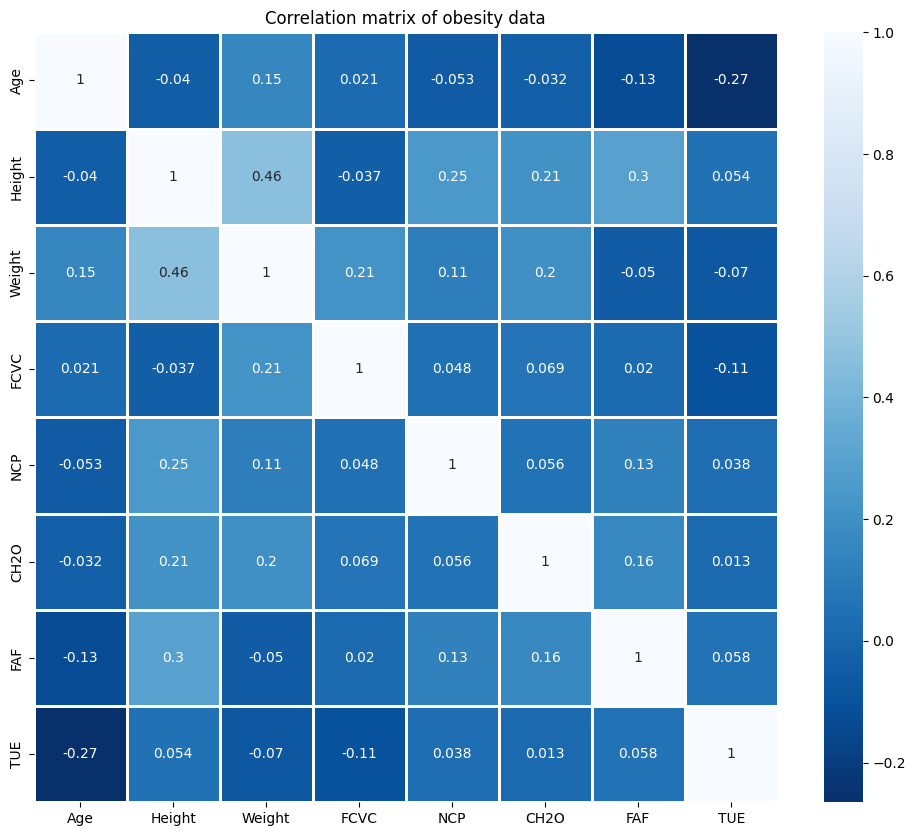

In [47]:
plt.figure(figsize = (12, 10))
sns.heatmap(obesity_data.corr(),
           annot = True,
           cmap = "Blues_r",
           linewidths = 2,
           linecolor = "white")
plt.title("Correlation matrix of obesity data")
plt.show()

Here we have obtained a corelation matrix

Preprocessing

In [48]:
obesity_dummies = pd.get_dummies(obesity_data[["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"]])



In [53]:
obesity_numeric = obesity_data[["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]]

In [50]:
obesity_lab = obesity_data[["NObeyesdad"]]

All three sets - numeric features, one-hot encoded ones, and labels are concatenated in a new DataFrame. It has 32 columns now. Its head rows are displayed below.

In [54]:
obesity_concatenated = pd.concat([obesity_numeric, obesity_dummies, obesity_lab], axis = 1)

In [56]:
obesity_concatenated.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,1,0,...,0,0,0,1,0,0,0,1,0,Normal_Weight
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,1,0,...,0,0,1,0,0,0,0,1,0,Normal_Weight
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,0,1,...,0,1,0,0,0,0,0,1,0,Normal_Weight
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,0,1,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,0,1,...,0,0,1,0,0,0,0,1,0,Overweight_Level_II


Features and labels are separated and stored in different variables.

In [57]:
obesity_label = obesity_concatenated["NObeyesdad"]
obesity_features = obesity_concatenated.drop("NObeyesdad", axis = 1)

In [58]:
obesity_label

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2090, dtype: object

 Convert Numerical Values

In [59]:
obesity_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2090 entries, 0 to 2110
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 2090 non-null   float64
 1   Height                              2090 non-null   float64
 2   Weight                              2090 non-null   float64
 3   FCVC                                2090 non-null   float64
 4   NCP                                 2090 non-null   float64
 5   CH2O                                2090 non-null   float64
 6   FAF                                 2090 non-null   float64
 7   TUE                                 2090 non-null   float64
 8   Gender_Female                       2090 non-null   uint8  
 9   Gender_Male                         2090 non-null   uint8  
 10  family_history_with_overweight_no   2090 non-null   uint8  
 11  family_history_with_overweight_yes  2090 no

In [60]:
obesity_features = obesity_features.astype("float")

Scaling

In [61]:
obesity_features_scaled = MinMaxScaler().fit_transform(obesity_features)

In [62]:
obesity_features_scaled.min(axis = 1), obesity_features_scaled.max(axis = 1)

(array([0., 0., 0., ..., 0., 0., 0.]), array([1., 1., 1., ..., 1., 1., 1.]))

Encoding labels

In [63]:
encoder = LabelEncoder()

In [64]:
encoder.fit(obesity_label)

LabelEncoder()

In [65]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

In [66]:
obesity_labels_encoded = encoder.transform(obesity_label)

In [67]:
obesity_labels_encoded

array([1, 1, 1, ..., 4, 4, 4])

Splitting the data into testing and training by using test-train split

In [68]:
obesity_features_tr, obesity_features_ts, obesity_labels_tr, obesity_labels_ts = train_test_split(
                obesity_features, obesity_labels_encoded,
                test_size = 0.2, stratify = obesity_labels_encoded,
                random_state = 42) # shuffle=True

In [69]:
obesity_features_tr.shape, obesity_labels_tr.shape, obesity_features_ts.shape, obesity_labels_ts.shape

((1672, 31), (1672,), (418, 31), (418,))

In [71]:
Counter(obesity_labels_tr)

Counter({4: 259, 3: 238, 0: 217, 2: 281, 1: 214, 5: 232, 6: 231})

**Train model to classify data into obesity categories**

In [72]:
model_tree = DecisionTreeClassifier(max_depth = 13, random_state = 42)

In [75]:
def train_predict_score(estimator, train_features, train_labels, test_features, test_labels):
    """
    Function: Trains model, predict classes and computes accuracy and f1 score.

    Parameters: estimator, X_train, y_train, X_test, y_test.
    """
    estimator.fit(train_features, train_labels)

    print(f"Accuracy on Train data: {accuracy_score(train_labels, estimator.predict(train_features))}")
    print(f"F1 score on Train data: {f1_score(train_labels, estimator.predict(train_features), average = 'weighted')}")
    print(f"Accuracy on Test data: {accuracy_score(test_labels, estimator.predict(test_features))}")
    print(f"F1 on Test data: {f1_score(test_labels, estimator.predict(test_features), average = 'weighted')}")

In [76]:
train_predict_score(model_tree, obesity_features_tr, obesity_labels_tr, obesity_features_ts, obesity_labels_ts)

Accuracy on Train data: 0.9970095693779905
F1 score on Train data: 0.997007835899882
Accuracy on Test data: 0.9138755980861244
F1 on Test data: 0.9137165855471658


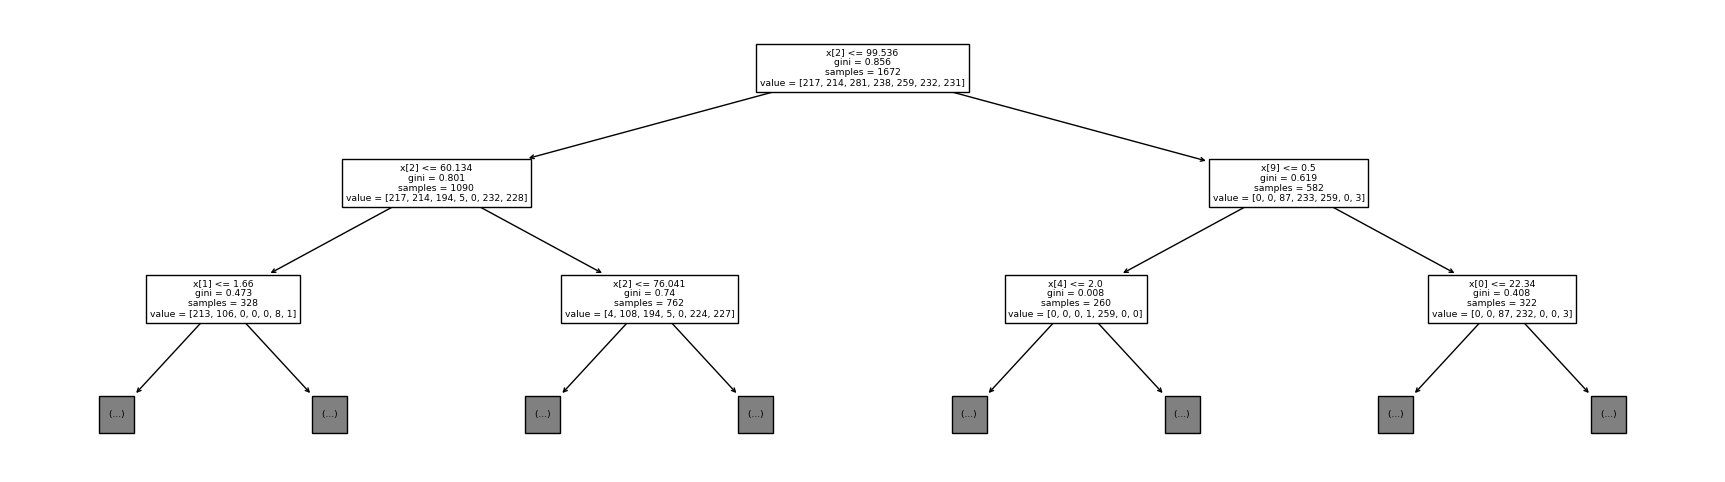

In [77]:
plt.figure(figsize = (22, 6))
plot_tree(model_tree, max_depth = 2)
plt.show()

In [78]:
print(classification_report(obesity_labels_ts, model_tree.predict(obesity_features_ts)))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95        54
           1       0.83      0.80      0.81        54
           2       0.89      0.93      0.91        70
           3       0.98      0.98      0.98        59
           4       1.00      0.98      0.99        65
           5       0.83      0.84      0.84        58
           6       0.93      0.88      0.90        58

    accuracy                           0.91       418
   macro avg       0.91      0.91      0.91       418
weighted avg       0.91      0.91      0.91       418



In [79]:
list(encoder.classes_)

['Insufficient_Weight',
 'Normal_Weight',
 'Obesity_Type_I',
 'Obesity_Type_II',
 'Obesity_Type_III',
 'Overweight_Level_I',
 'Overweight_Level_II']

**Confusion Matrix**

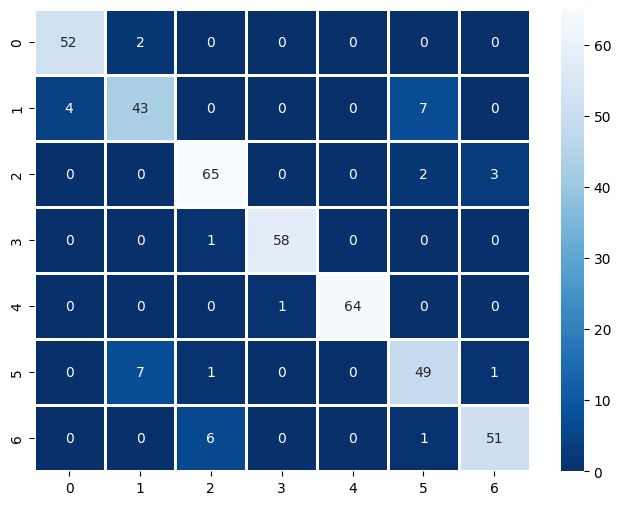

In [80]:
plt.figure(figsize = (8, 6))
sns.heatmap(confusion_matrix(obesity_labels_ts, model_tree.predict(obesity_features_ts)),
           annot = True,
           fmt = ".0f",
           cmap = "Blues_r",
           linewidths = 2,
           linecolor = "white",
           xticklabels = model_tree.classes_,
           yticklabels = model_tree.classes_)
plt.show()

In [81]:
obesity_score_probability = model_tree.predict_proba(obesity_features_ts)

In [83]:
obesity_score_probability

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

 Clustering

In [84]:
kmeans = KMeans(n_clusters = 7, init = "k-means++")

In [85]:
model_tree.feature_importances_

array([0.04592887, 0.22601184, 0.45027615, 0.02651131, 0.00904621,
       0.00155583, 0.00306609, 0.00686719, 0.00070305, 0.15968942,
       0.        , 0.0012655 , 0.01830739, 0.0009374 , 0.00233557,
       0.00835625, 0.00140611, 0.        , 0.00139115, 0.00281421,
       0.        , 0.        , 0.        , 0.        , 0.0029175 ,
       0.02461334, 0.00270537, 0.        , 0.        , 0.        ,
       0.00329425])

In [86]:
def plot_clusters(dataset, feature_one, feature_two, labels, title = None):
    """
    Function: Computes and displays clusters.

    Parameters: dataset, 2 features, cluster indicator.
    """
    sns.scatterplot(data = dataset, x = feature_one, y = feature_two, hue = labels, palette = "Blues_r")
    if title is not None:
        plt.title(title)
    plt.show()

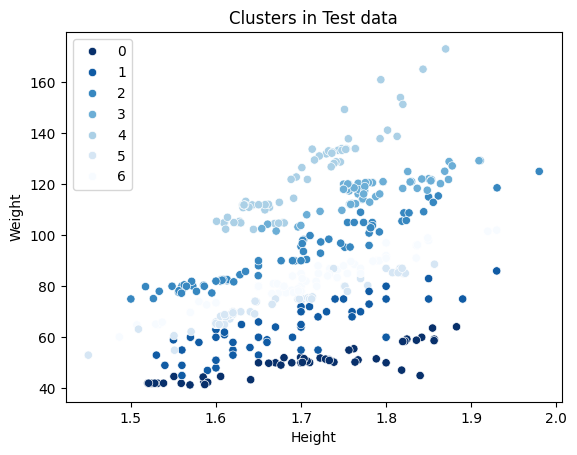

In [87]:
plot_clusters(obesity_features_ts, "Height", "Weight", obesity_labels_ts, "Clusters in Test data")

In [88]:
predicted_labels = kmeans.fit_predict(obesity_features_ts)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Conclusion**

A person's height and weight are the important factors determining his/her obesity status.

**Thankyou**